In [34]:
import os
import json

import numpy as np

In [35]:
data_path = "../../data/results/two-shot/5x5-relation"

In [36]:
grouped_data = []
for parent_folder in os.listdir(f"./{data_path}"):
    validation_result = []
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        fold_result = []
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                fold_result.append(json_data)
        validation_result.append(fold_result)
    grouped_data.append(validation_result)

In [37]:
result_paths = os.listdir(f"./{data_path}")
data_fold_0 = []
for result_path in result_paths:
    for filename in os.listdir(f"./{data_path}/{result_path}/0"):
        filepath = os.path.join(f"./{data_path}/{result_path}/0", filename)
        with open(filepath, "r") as file:
            json_data = json.load(file)
            data_fold_0.append(json_data)
            
f1_scores_fold_0 = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data_fold_0]
lengths_fold_0 = [d["document_length"] for d in data_fold_0]

np.mean(f1_scores_fold_0)

0.09866666666666668

In [38]:
result_paths = os.listdir(f"./{data_path}")
data_fold_1 = []
for result_path in result_paths:
    for filename in os.listdir(f"./{data_path}/{result_path}/1"):
        filepath = os.path.join(f"./{data_path}/{result_path}/1", filename)
        with open(filepath, "r") as file:
            json_data = json.load(file)
            data_fold_1.append(json_data)
            
f1_scores_fold_1 = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data_fold_1]
lengths_fold_1 = [d["document_length"] for d in data_fold_1]

np.mean(f1_scores_fold_1)

0.0782222222222222

In [39]:
result_paths = os.listdir(f"./{data_path}")
data_fold_2 = []
for result_path in result_paths:
    for filename in os.listdir(f"./{data_path}/{result_path}/2"):
        filepath = os.path.join(f"./{data_path}/{result_path}/2", filename)
        with open(filepath, "r") as file:
            json_data = json.load(file)
            data_fold_2.append(json_data)
            
f1_scores_fold_2 = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data_fold_2]
lengths_fold_2 = [d["document_length"] for d in data_fold_2]

np.mean(f1_scores_fold_2)

0.08977777777777776

In [40]:
result_paths = os.listdir(f"./{data_path}")
data_fold_3 = []
for result_path in result_paths:
    for filename in os.listdir(f"./{data_path}/{result_path}/3"):
        filepath = os.path.join(f"./{data_path}/{result_path}/3", filename)
        with open(filepath, "r") as file:
            json_data = json.load(file)
            data_fold_3.append(json_data)
            
f1_scores_fold_3 = [d["metrics"]["relation_metrics"]["overall"]["f1_score"]  for d in data_fold_3]
lengths_fold_3 = [d["document_length"] for d in data_fold_3]

np.mean(f1_scores_fold_3)

0.08199999999999999

In [41]:
result_paths = os.listdir(f"./{data_path}")
data_fold_4 = []
for result_path in result_paths:
    for filename in os.listdir(f"./{data_path}/{result_path}/4"):
        filepath = os.path.join(f"./{data_path}/{result_path}/4", filename)
        with open(filepath, "r") as file:
            json_data = json.load(file)
            data_fold_4.append(json_data)
            
f1_scores_fold_4 = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data_fold_4]
lengths_fold_4 = [d["document_length"] for d in data_fold_4]

np.mean(f1_scores_fold_4)

0.126

In [42]:
data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]
document_lengths = [d["document_length"] for d in data]

In [43]:
np.mean(f1_scores)

0.09493333333333333

In [44]:
import matplotlib.pyplot as plt

KeyError: 'context_length'

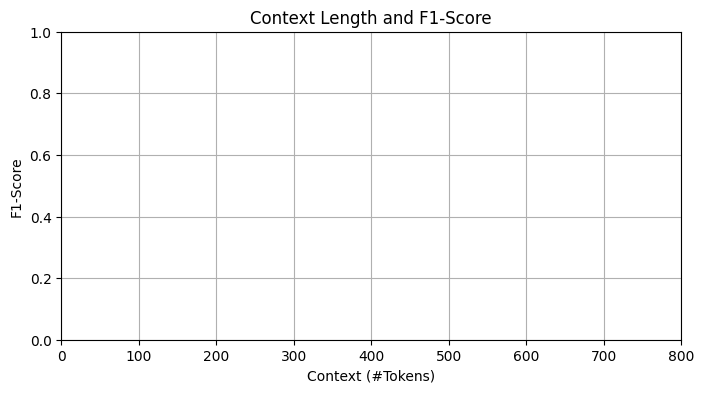

In [45]:
plt.figure(figsize=(8,4))

plt.xlabel('Context (#Tokens)')
plt.ylabel('F1-Score')
plt.title('Context Length and F1-Score')

plt.grid(True)

plt.xlim(0, 800)
plt.ylim(0, 1)

context_lengths = [d["context_length"] for d in data]

plt.scatter(context_lengths, f1_scores, s=10, alpha=0.5, c="blue")

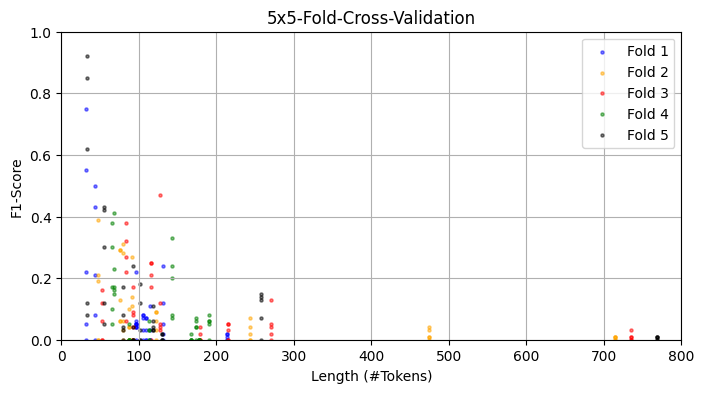

In [ ]:
plt.figure(figsize=(8,4))

plt.xlabel('Length (#Tokens)')
plt.ylabel('F1-Score')
plt.title('5x5-Fold-Cross-Validation')

plt.grid(True)

plt.xlim(0, 800)
plt.ylim(0, 1)

plt.scatter(lengths_fold_0, f1_scores_fold_0, s=5, label="Fold 1", alpha=0.5, c="blue")
plt.scatter(lengths_fold_1, f1_scores_fold_1, s=5, label="Fold 2", alpha=0.5, c="orange")
plt.scatter(lengths_fold_2, f1_scores_fold_2, s=5, label="Fold 3", alpha=0.5, c="red")
plt.scatter(lengths_fold_3, f1_scores_fold_3, s=5, label="Fold 4", alpha=0.5, c="green")
plt.scatter(lengths_fold_4, f1_scores_fold_4, s=5, label="Fold 5", alpha=0.5, c="black")

plt.legend()

plt.savefig('scatter_plot.png', dpi=700)

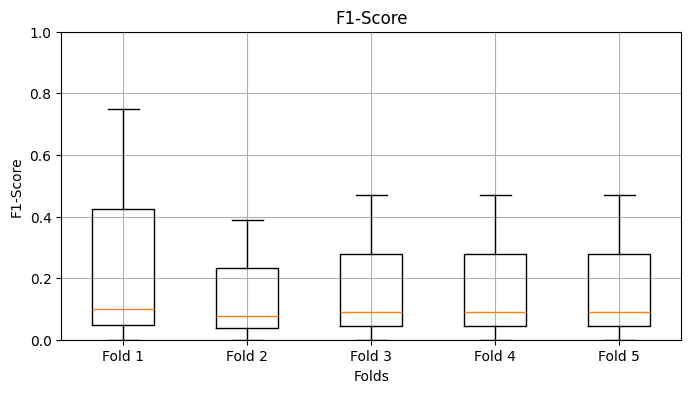

In [ ]:
data1 = np.min(f1_scores_fold_0), np.mean(f1_scores_fold_0), np.max(f1_scores_fold_0)
data2 = np.min(f1_scores_fold_1), np.mean(f1_scores_fold_1), np.max(f1_scores_fold_1)
data3 = np.min(f1_scores_fold_2), np.mean(f1_scores_fold_2), np.max(f1_scores_fold_2)
data4 = np.min(f1_scores_fold_3), np.mean(f1_scores_fold_3), np.max(f1_scores_fold_3)
data5 = np.min(f1_scores_fold_4), np.mean(f1_scores_fold_4), np.max(f1_scores_fold_4)

plt.figure(figsize=(8,4))

# Create a boxplot
plt.boxplot([data1, data2, data3, data3, data3])

# Add labels to the x-axis
plt.xticks([1, 2, 3, 4, 5], ['Fold 1', 'Fold 2', 'Fold 3','Fold 4','Fold 5'])

# Add a title and labels
plt.title('F1-Score')
plt.xlabel('Folds')
plt.ylabel('F1-Score')

plt.ylim(0, 1)

plt.grid(True)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Mean F1-Score 5x5-Fold-Cross-Validation')

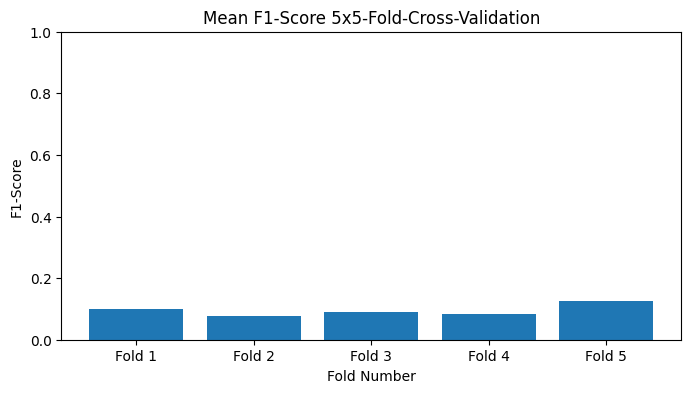

In [ ]:
values = [np.mean(f1_scores_fold_0), np.mean(f1_scores_fold_1), np.mean(f1_scores_fold_2), np.mean(f1_scores_fold_3), np.mean(f1_scores_fold_4)]
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

plt.figure(figsize=(8,4))

# Create bar plot
plt.bar(labels, values)

plt.ylim(0, 1.0)

# Add labels and title
plt.xlabel('Fold Number')
plt.ylabel('F1-Score')
plt.title('Mean F1-Score 5x5-Fold-Cross-Validation')

In [ ]:
entity_keys = [
    "actor",
    "activity",
    "activity_data",
    "and_gateway",
    "xor_gateway",
    "condition_specification",
    "further_specification",
]

relation_keys = [
    "actor_performer",
    "actor_recipient",
    "same_gateway",
    "flow",
    "uses",
    "further_specification",
]

In [ ]:
mean_f1_scores_entity = {}
for entity_key in entity_keys:
    mean_f1_scores_entity[entity_key] = np.mean([d["metrics"]["entity_metrics"][entity_key]["f1_score"] for d in data])
    
mean_f1_scores_entity

{'actor': 0.20653333333333332,
 'activity': 0.37173333333333336,
 'activity_data': 0.08991111111111111,
 'and_gateway': 0.0,
 'xor_gateway': 0.19688888888888886,
 'condition_specification': 0.026444444444444444,
 'further_specification': 0.0077777777777777776}

In [ ]:
import numpy as np

entity_rows = [
    ["Entität", "F1-Score (Durchschnitt 5x5-Cross-Validation)"],
    ["Actor", mean_f1_scores_entity["actor"]],
    ["Activity", mean_f1_scores_entity["activity"]],
    ["Activity Data", mean_f1_scores_entity["activity_data"]],
    ["AND-Gateway", mean_f1_scores_entity["and_gateway"]],
    ["XOR-Gateway", mean_f1_scores_entity["xor_gateway"]],
    ["Condition Specification", mean_f1_scores_entity["condition_specification"]],
    ["Further Specification", mean_f1_scores_entity["further_specification"]],
]

In [ ]:
import latextable

from texttable import Texttable

table_entity = Texttable()

table_entity.set_cols_align(["l", "r",])
table_entity.set_cols_valign(["t", "m"])

table_entity.add_rows(entity_rows)

print(
    latextable.draw_latex(
        table_entity,
        caption="Durschnittlicher F1-Score Entitäten 5x5-Cross-Validation",
        label="table:example_table",
    )
)

\begin{table}
	\begin{center}
		\begin{tabular}{|l|r|}
			\hline
			Entität & F1-Score (Durchschnitt 5x5-Cross-Validation) \\
			\hline
			Actor & 0.207 \\
			\hline
			Activity & 0.372 \\
			\hline
			Activity Data & 0.090 \\
			\hline
			AND-Gateway & 0 \\
			\hline
			XOR-Gateway & 0.197 \\
			\hline
			Condition Specification & 0.026 \\
			\hline
			Further Specification & 0.008 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{Durschnittlicher F1-Score Entitäten 5x5-Cross-Validation}
	\label{table:example_table}
\end{table}


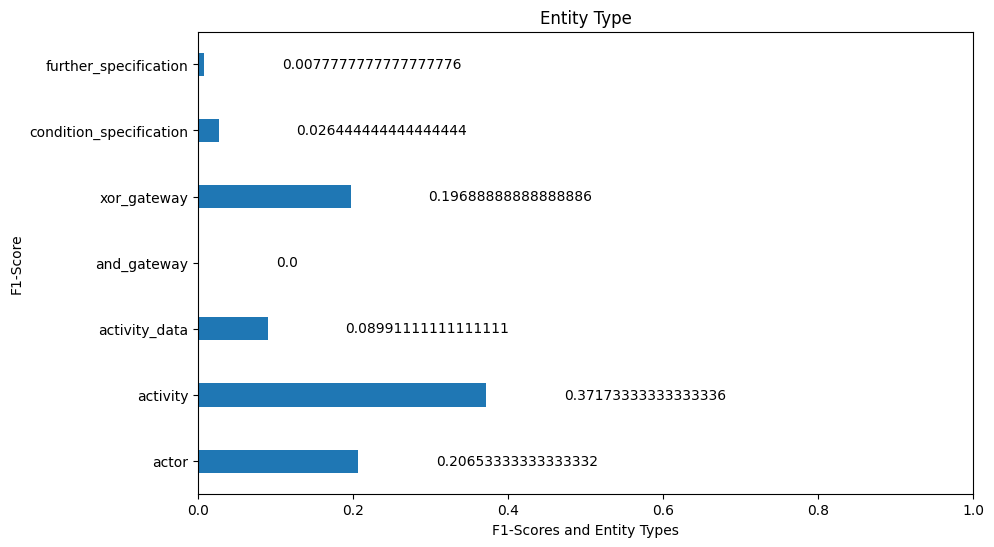

In [ ]:
bar_height = 0.35

bar_positions = np.arange(len(entity_keys))

figure_height = max(6, len(entity_keys) * 0.8)

plt.figure(figsize=(10, figure_height))

plt.barh(bar_positions, list(mean_f1_scores_entity.values()), height=bar_height)

plt.xlabel("F1-Scores and Entity Types")
plt.ylabel("F1-Score")
plt.title("Entity Type")
plt.xlim(0.0, 1.0)
plt.yticks(bar_positions, entity_keys)

for i, value in enumerate(list(mean_f1_scores_entity.values())):
    plt.text(value + 0.1, bar_positions[i], str(value), ha="left", va="center")

In [ ]:
mean_f1_scores_relations = {}
for relation_key in relation_keys:
    mean_f1_scores_relations[relation_key] = np.mean([d["metrics"]["relation_metrics"][relation_key]["f1_score"] for d in data])
    
mean_f1_scores_relations

{'actor_performer': 0.13622222222222222,
 'actor_recipient': 0.07773333333333335,
 'same_gateway': 0.01955555555555556,
 'flow': 0.10595555555555557,
 'uses': 0.05946666666666666,
 'further_specification': 0.006311111111111111}

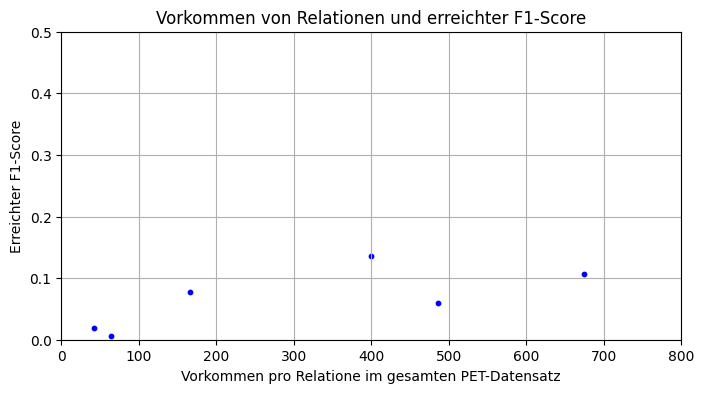

In [ ]:
plt.figure(figsize=(8,4))

plt.xlabel('Vorkommen pro Relatione im gesamten PET-Datensatz')
plt.ylabel('Erreichter F1-Score')
plt.title('Vorkommen von Relationen und erreichter F1-Score')

plt.grid(True)

plt.xlim(0, 800)
plt.ylim(0, 0.5)

relation_counts_total = [399, 166, 42, 675, 486, 64]

plt.scatter(relation_counts_total, list(mean_f1_scores_relations.values()), s=10, c="blue")

plt.savefig('zusammenhang_vorkommen_f1_score_relation.png', dpi=700)

In [ ]:
import latextable

from texttable import Texttable

table_entity = Texttable()

table_entity.set_cols_align(["l", "r",])
table_entity.set_cols_valign(["t", "m"])

table_entity.add_rows(entity_rows)

print(
    latextable.draw_latex(
        table_entity,
        caption="Durschnittlicher F1-Score Entitäten 5x5-Cross-Validation",
        label="table:example_table",
    )
)

\begin{table}
	\begin{center}
		\begin{tabular}{|l|r|}
			\hline
			Entität & F1-Score (Durchschnitt 5x5-Cross-Validation) \\
			\hline
			Actor & 0.207 \\
			\hline
			Activity & 0.372 \\
			\hline
			Activity Data & 0.090 \\
			\hline
			AND-Gateway & 0 \\
			\hline
			XOR-Gateway & 0.197 \\
			\hline
			Condition Specification & 0.026 \\
			\hline
			Further Specification & 0.008 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{Durschnittlicher F1-Score Entitäten 5x5-Cross-Validation}
	\label{table:example_table}
\end{table}


In [ ]:
import numpy as np

relation_rows = [
    ["Relation", "F1-Score (Durchschnitt 5x5-Cross-Validation)"],
    ["Actor Performer", mean_f1_scores_relations["actor_performer"]],
    ["Actor Recipient", mean_f1_scores_relations["actor_recipient"]],
    ["Same Gateway", mean_f1_scores_relations["same_gateway"]],
    ["Flow", mean_f1_scores_relations["flow"]],
    ["Uses", mean_f1_scores_relations["uses"]],
    ["Further Specification", mean_f1_scores_relations["further_specification"]],
]

In [ ]:
import latextable

from texttable import Texttable

table_relation = Texttable()

table_relation.set_cols_align(["l", "r",])
table_relation.set_cols_valign(["t", "m"])

table_relation.add_rows(relation_rows)

print(
    latextable.draw_latex(
        table_relation,
        caption="Durschnittlicher F1-Score Relationen 5x5-Cross-Validation",
        label="table:example_table",
    )
)

\begin{table}
	\begin{center}
		\begin{tabular}{|l|r|}
			\hline
			Relation & F1-Score (Durchschnitt 5x5-Cross-Validation) \\
			\hline
			Actor Performer & 0.136 \\
			\hline
			Actor Recipient & 0.078 \\
			\hline
			Same Gateway & 0.020 \\
			\hline
			Flow & 0.106 \\
			\hline
			Uses & 0.059 \\
			\hline
			Further Specification & 0.006 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{Durschnittlicher F1-Score Relationen 5x5-Cross-Validation}
	\label{table:example_table}
\end{table}


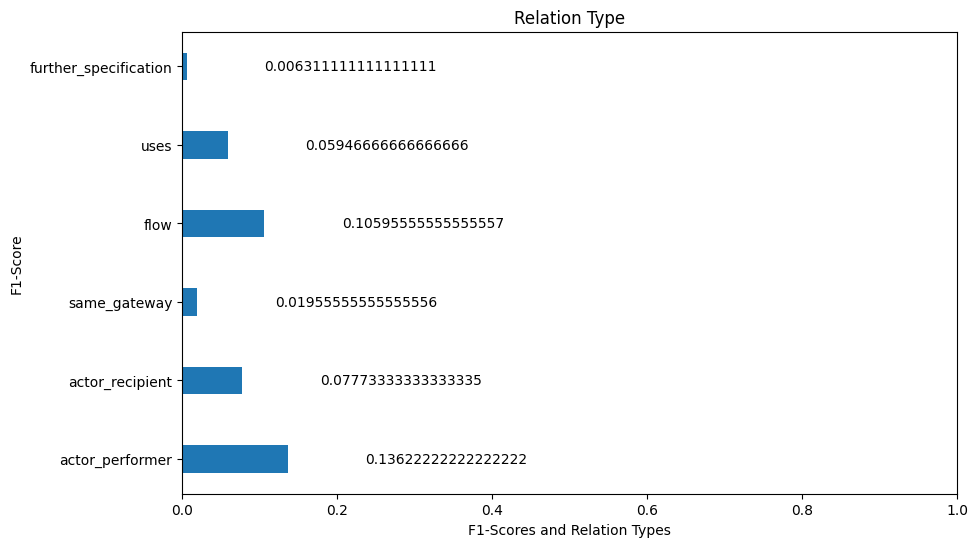

In [ ]:
bar_height = 0.35

bar_positions = np.arange(len(relation_keys))

figure_height = max(6, len(relation_keys) * 0.8)

plt.figure(figsize=(10, figure_height))

plt.barh(bar_positions, list(mean_f1_scores_relations.values()), height=bar_height)

plt.xlabel("F1-Scores and Relation Types")
plt.ylabel("F1-Score")
plt.title("Relation Type")
plt.xlim(0.0, 1.0)
plt.yticks(bar_positions, relation_keys)

for i, value in enumerate(list(mean_f1_scores_relations.values())):
    plt.text(value + 0.1, bar_positions[i], str(value), ha="left", va="center")